# 합성곱 신경망을 사용한 이미지 분류

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/8-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

#수업시간에 배운 CNN을 이용하여 이미지를 분류해 보자!!!


데이터 셋 정보: https://www.cs.toronto.edu/~kriz/cifar.html

## CIFAR-10 데이터 셋 읽어오기

In [12]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt


(train_input, train_target), (test_input, test_target) = \
    cifar10.load_data()


##로드한 데이터의 shape을 확인하시오 (샘플 수: 50000, 32 x 32, RGB format).
##데이터 셋의 클래스 수를 확인하시오 (numpy unique() 활용 - 7일차 교육 MNIST 실습의 데이터 준비 슬라이드 참고)

In [13]:
print(train_input.shape)
print(np.unique(train_target))

(50000, 32, 32, 3)
[0 1 2 3 4 5 6 7 8 9]


## 이미지의 픽셀값을 0~1값으로 정규화하시오

In [14]:
train_scaled = train_input/ 255.0

##데이터 세트를 훈련데이터 (80%)와 검증세트로 분리하시오

In [15]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

#분류가 잘 되었는지 확인하시오 (훈련 세트 = 40000, 검증세트 = 10000)

In [16]:
print(train_scaled.shape)

(40000, 32, 32, 3)


## matplotlib의 imshow() 메소드를 사용하여 정규화된 훈련세트의 0번째 인덱스의 이미지를 color bar와 함께 출력하시오. 

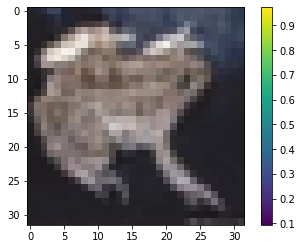

In [17]:
import matplotlib.pyplot as plt
plt.imshow(train_scaled[0]) #변수명은 변경 가능
plt.colorbar()
plt.show()

## 합성곱 신경망 만들기

In [18]:
model = keras.Sequential()

##첫번째 합성곱 층을 생성후 모델에 추가하시오.
필터 수: 32개\
필터 (커널) 사이즈: 3 x 3 x 3\
활성화 함수: ReLU\
패딩: same padding\
stride: 1\
input_shape는 데이터 특성에 맞게 지정

In [19]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                              padding='same', input_shape=(32,32,3)))

### 2x2 최대 풀링 (max pooling) 층을 추가하시오

In [20]:
model.add(keras.layers.MaxPooling2D(2))

##두번째 합성곱 층을 생성 후 모델에 추가하시오
필터 수: 64개\
필터 (커널) 사이즈: 3 x 3 x 32\
활성화 함수: ReLU\
패딩: same padding\
stride: 1

In [21]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', 
                              padding='same'))

## 최대 풀링 (max pooling) 층을 추가하시오.
stride: 2

In [22]:
model.add(keras.layers.MaxPooling2D(2))

## Flatten 층을 추가하고, 출력을 위한 Dense 층 두개를 추가하시오.
## Flatten 층과 첫번째 Dense 층 사이에 Dropout 층을 추가하시오 (Dropout율: 30%) 
첫번째 Dense 층의 뉴런 갯수: 100개\
첫번째 Dense 층의 활성화 함수: ReLU\
두번째 Dense 층의 뉴런 갯수: 데이터 특성에 맞게 설정\
두번째 Dense 층의 활성화 함수: Softmax


In [23]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

##model.summary()를 사용하여 모델이 잘 구성되었는지 확인

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               409700    
_________________________________________________________________
dropout (Dropout)            (None, 100)              

##utils.plot_model()을 사용하여 모델이 잘 구성되었는지 확인

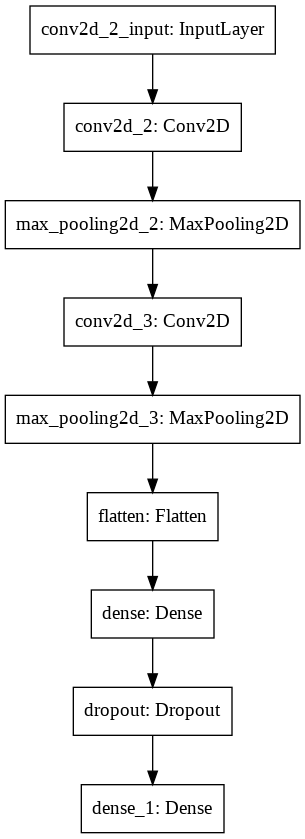

In [25]:
keras.utils.plot_model(model)

## 모델 컴파일과 훈련
optimizer: adam\
손실함수: 다중분류를 위한 함수로 지정\
accuract 메트릭 추가\

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')


## ModelCheckPoint 콜백 및 Early_stopping 콜백 사용을 사용하여 최적의 모델을 찾고 저장하시오.

In [27]:

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1250/1250 [==============================] - 36s 4ms/step - loss: 1.6047 - accuracy: 0.4162 - val_loss: 1.2672 - val_accuracy: 0.5518
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2596 - accuracy: 0.5507 - val_loss: 1.0840 - val_accuracy: 0.6086
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.1145 - accuracy: 0.6047 - val_loss: 1.0123 - val_accuracy: 0.6437
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0424 - accuracy: 0.6332 - val_loss: 1.0188 - val_accuracy: 0.6435
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9695 - accuracy: 0.6557 - val_loss: 0.9487 - val_accuracy: 0.6675
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9176 - accuracy: 0.6756 - val_loss: 0.9276 - val_accuracy: 0.6720
Epoch 7/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8578 - accuracy: 0.6944 - val_loss: 0.8989 - val_accuracy

## matplotlib를 사용하여 학습 세트와 검증세트의 Loss율을 확인하시오.

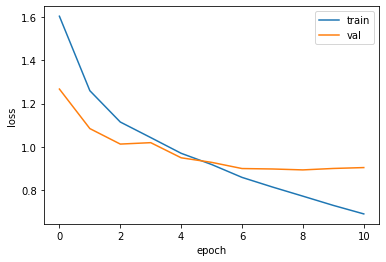

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## model.evaluate()를 사용하여 검증 세트에 대한 성능을 측정하시오

In [29]:
model.evaluate(val_scaled, val_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.8926 - accuracy: 0.6939


[0.892554521560669, 0.6938999891281128]

##검증세트의 두번째 (인덱스 1) 이미지 출력

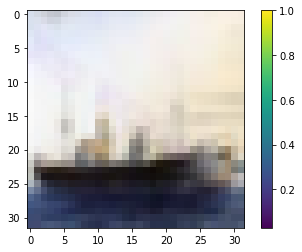

In [31]:
plt.imshow(val_scaled[1])
plt.colorbar()
plt.show()

## 검증세트 두번째 (인덱스 1) 샘플의 예측결과를 확인

In [32]:
preds = model.predict(val_scaled[1:2])
print(preds)

[[1.5097238e-03 1.4554007e-05 3.3733988e-06 1.5311361e-05 7.7622026e-08
  5.3349908e-08 5.3381791e-07 1.6370414e-08 9.9773431e-01 7.2211144e-04]]


## 위 예측결과를 그래프로 출력 후 확인

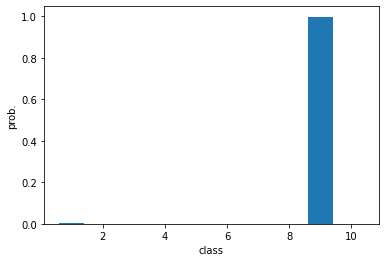

In [33]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [34]:
classes = ['비행기', '자동차', '새', '고양이', '사슴',
           '강아지', '개구리', '말', '배', '트럭']

In [35]:
import numpy as np
print(classes[np.argmax(preds)])

배


##테스트 세트에 대한 성능을 평가해보자 (evaluate() 사용)

In [37]:
test_scaled = test_input/ 255.0

In [38]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.9097 - accuracy: 0.6904


[0.9096720814704895, 0.6904000043869019]

## 성능을 향상시켜보자 (레이어 추가 등)